<a href="https://colab.research.google.com/github/Mohammad-Amirifard/Intrusion_Detection/blob/main/Part6_Conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intrusion Detection Using Machine Learning Techniques On CIC-IDS2017 Dataset**

Created By [Mohammad Amirifard](https://www.linkedin.com/in/mohammad-amirifard/)


<img src="https://www.teligentsolutions.com/wp-content/uploads/2015/04/Teligent_Solutions_Intrusion_Detection.jpg" alt="Image" />

# **Structure of notebooks**
`This program includes several notebooks regarding different parts.`

This is **notebook number 6**, called **Part6_Conclusion**

For other notebooks you can use the following links:





1.   Notebook number 1, [Part1_EDA](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part1_EDA.ipynb)
2.   Notebook number 2, [Part2_KNN_Models](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part2_KNN_Models.ipynb)
3.   Notebook number 3, [Part3_SVM_Models](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part3_SVM_Models.ipynb)
4.   Notebook number 4, [Part4_Gboost_Model](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part4_GBoost_Model.ipynb)
5.   Notebook number 5, [Part5_MLP_Model](https://github.com/Mohammad-Amirifard/Intrusion_Detection/blob/main/Notebooks/Part5_MLP_Model.ipynb)
6.   Notebook number 6, [Part6_Conclusion]()



# **Problem Statement**
The objective of this project is to **detect** and classify various types of **anomalies** within the `CIC-IDS2017 dataset`, which is a widely recognized benchmark dataset used for cybersecurity research, particularly in the domain of intrusion detection systems (IDS). Anomalies in this context refer to unusual or suspicious patterns in the network traffic data that may indicate potential security threats such as attacks or intrusions.

To achieve this, we will apply a range of **machine learning techniques** that are commonly used for anomaly detection and classification tasks. These techniques include, but are not limited to, supervised learning methods, such as decision trees, support vector machines, and neural networks, as well as unsupervised learning approaches like clustering algorithms and autoencoders. By leveraging these methods, we aim to accurately classify network traffic data into normal and anomalous categories.

The problem we are addressing is inherently a classification problem, where the primary goal is to categorize the data into predefined classes based on the learned patterns. This involves training machine learning models on labeled data to distinguish between normal and anomalous network traffic, enabling the detection of potential security threats with high precision and recall.

**Goal:**

Our ultimate aim is to develop a robust system that can effectively identify various types of anomalies, contributing to the enhancement of network security measures.

**Dataset:**

you can see detail of available dataset on this [link](https://www.unb.ca/cic/datasets/ids-2017.html)

# **Table of Content**



<div class="toc" style="background-color: #d4d0cf; padding: 10px; border-radius: 5px;">
  <h2 style="color: black;"></h2>
  <ul>
    <li style="color: black;">Import Libraries</li>
    <li style="color: black;">Download Reuslts</li>
    <li style="color: black;">Load Reuslts</li>
    <li style="color: black;">Performance Plot</li>
    <li style="color: black;">Conclusion</li>
  </ul>
</div>


# **Import Libraries**

Here we import libraries on which we need to work.

In [1]:
!pip install -qq gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os, gdown
import zipfile, time
import warnings
import joblib
warnings.filterwarnings('ignore')


# **Download Results**

Here we download results from different models mentioned in previous notebooks.

In [2]:
def download_file_from_google_drive(file_id, destination):

    """
    Input: file_id (Obtained from google drive), destionation (For saving the file)
    Output: _ (Download the file in destination directory)
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destination, quiet=True) # download file using given URL


def unzip_dataset(extraction_dir):

  """
  Input: Extraction_dir (Direction of dataset to unzip into)
  Output: _ (Exract the zip file in the given direction)
  """

  # Ensure the extraction directory exists
  os.makedirs(extraction_dir, exist_ok=True)

  # Unzip the file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extraction_dir)



# Setup variables to download dataset
current_working_dir = os.getcwd()
destination = current_working_dir
zip_file_path = os.path.join(destination, 'Models_Results.zip')
file_id =  '1VNvYgyWUjCJ5oQTLgDYBOmChaWiZFMQn' # File Id
extraction_dir = os.path.join(destination,'Models_Results/')
# call functions
download_file_from_google_drive(file_id, zip_file_path) # Download
print('clean_dataset.zip was downloaded successfuly.')
unzip_dataset(extraction_dir)                           # Unzip
print('clean_dataset.zip  was unziped successfuly.')

clean_dataset.zip was downloaded successfuly.
clean_dataset.zip  was unziped successfuly.


# **Load Results**


In [3]:
Knn_1_result = pd.read_csv(os.path.join(extraction_dir,'KNN_1_performance_df.csv'))
Knn_2_result = pd.read_csv(os.path.join(extraction_dir,'KNN_2_performance_df.csv'))
Knn_3_result = pd.read_csv(os.path.join(extraction_dir,'KNN_3_performance_df.csv'))
Svm_1_result = pd.read_csv(os.path.join(extraction_dir,'SVM_1_performance_df.csv'))
Svm_2_result = pd.read_csv(os.path.join(extraction_dir,'SVM_2_performance_df.csv'))
Gboost_result = pd.read_csv(os.path.join(extraction_dir,'GBoost_performance_df.csv'))
MLP_result = pd.read_csv(os.path.join(extraction_dir,'MLP_performance_df.csv'))

all_in_one = [Knn_1_result,Knn_2_result,Knn_3_result,Svm_1_result,Svm_2_result,Gboost_result,MLP_result]

In [4]:
# Let's see one of them.
Knn_1_result

,Model_name,Classes,Precision,Recall,F1_Score,Support,Training_Time,Predicting_Time
0,KNN_1,Class-0,0.999075,0.998551,0.998813,87633.0000,0.000779,9.770045
1,KNN_1,Class-1,0.740741,0.526316,0.615385,76.0000,0.000779,9.770045
2,KNN_1,Class-2,0.994599,0.998995,0.996792,4977.0000,0.000779,9.770045
3,KNN_1,Class-3,0.974935,0.965753,0.970323,1168.0000,0.000779,9.770045
4,KNN_1,Class-4,0.990488,0.999675,0.995060,6146.0000,0.000779,9.770045
5,KNN_1,accuracy,0.997900,0.997900,0.997900,0.9979,0.000779,9.770045
6,KNN_1,macro avg,0.939968,0.897858,0.915275,100000.0000,0.000779,9.770045
7,KNN_1,weighted avg,0.997846,0.997900,0.997858,100000.0000,0.000779,9.770045


In [5]:
Svm_1_result

,Model_name,Classes,Precision,Recall,F1_Score,Support,Training_Time,Predicting_Time
0,SVM_1,Class-0,0.964247,0.984207,0.974125,87633.00000,2.430361,0.000385
1,SVM_1,Class-1,0.000000,0.000000,0.000000,76.00000,2.430361,0.000385
2,SVM_1,Class-2,0.973179,0.641551,0.773311,4977.00000,2.430361,0.000385
3,SVM_1,Class-3,0.000000,0.000000,0.000000,1168.00000,2.430361,0.000385
4,SVM_1,Class-4,0.821483,0.971852,0.890363,6146.00000,2.430361,0.000385
5,SVM_1,accuracy,0.954150,0.954150,0.954150,0.95415,2.430361,0.000385
6,SVM_1,macro avg,0.551782,0.519522,0.527560,100000.00000,2.430361,0.000385
7,SVM_1,weighted avg,0.943922,0.954150,0.946864,100000.00000,2.430361,0.000385


#**Perfomance Plot**

In [6]:
import seaborn as sns

def plot_performance(model_names, F1_Score_Macro_Avg_list, F1_Score_Weighted_Avg_list, Accuracy_list):
    # Set seaborn style
    sns.set(style="whitegrid")

    species = model_names
    penguin_means = {
        'F1_Score_Macro_Avg': F1_Score_Macro_Avg_list,
        'F1_Score_Weighted_Avg': F1_Score_Weighted_Avg_list,
        'Accuracy': Accuracy_list
    }

    x = np.arange(len(species))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))  # Larger size for better readability

    # Use a seaborn color palette
    colors = sns.color_palette("pastel")

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])

        # Set bar labels with rotation and outside positioning
        ax.bar_label(rects, padding=3, label_type='edge', fontsize=10, weight='bold', rotation=90)

        multiplier += 1

    # Add text for labels, title, and custom x-axis tick labels
    ax.set_ylabel('Percentage (%)', fontsize=12, weight='bold')
    ax.set_title('Models Performance', fontsize=16, weight='bold')
    ax.set_xticks(x + width, species, fontsize=12, weight='bold')
    ax.legend(loc='best', ncols=3, fontsize=10)

    # Set y-axis limits and add grid with customization
    ax.set_ylim(0, 1.3)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Remove top and right spines for a cleaner look
    sns.despine()
    save_path = os.path.join(extraction_dir,'Performance_Plot.png')
    plt.savefig(save_path, dpi=300)
    plt.show()




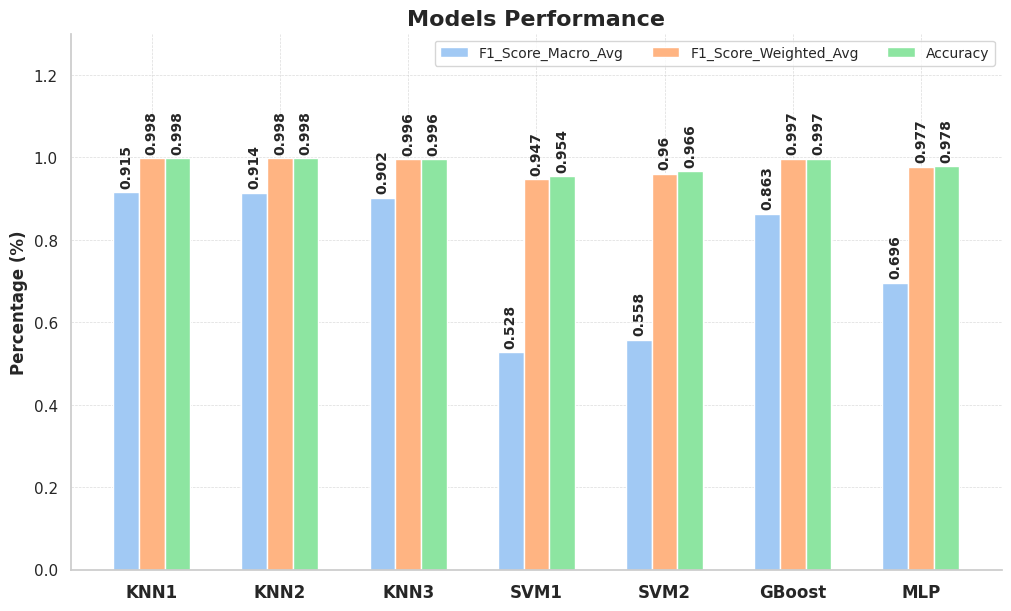

In [7]:
# Let's see the the performance of all in a plot
model_names =  ['KNN1','KNN2','KNN3','SVM1','SVM2','GBoost','MLP']

Accuracy_list = []
F1_Score_Macro_Avg_list = []
F1_Score_Weighted_Avg_list = []
for model in all_in_one:

  Accuracy_list.append(np.round(model['F1_Score'].iloc[-3],3))
  F1_Score_Macro_Avg_list.append(np.round(model['F1_Score'].iloc[-2],3))
  F1_Score_Weighted_Avg_list.append(np.round(model['F1_Score'].iloc[-1],3))

plot_performance(model_names, F1_Score_Macro_Avg_list, F1_Score_Weighted_Avg_list, Accuracy_list)

In [8]:
# Let's see the the performance of all models in a dataframe
pd.set_option('display.max_colwidth', 150)

description_dataframe = pd.DataFrame({'Models':['KNN_1','KNN_2','KNN_3','SVM_1','SVM_2','GBoost','MLP'],
                                      'Feature_selection_methods':['Random_Forest','Mutual Inoformation','RF','RF','RF','RF','RF'],
                                      'Configuration':["k = 3,p = 2,metric = manhattan","k = 3,p = 2,metric = manhattan","k = 3,p = 2,metric = manhattan",
                                                       "kerenl=Linear,regularization_term = l2,regularization_parameter = 1.5,max_iter = 1000,loss_function = hinge",
                                                        "kernel = rbf,degree = 2,regularization_parameter = 1",
                                                        "learning_rate = 0.1,n_estimators = 150",
                                                        "no_neurons_1 = 64,no_neurons_2 = 128,no_neurons_3 = 128,dropout_rate = 0.2,epoch = 10,batch_size = 32,learning_rate = 0.0001,activation ='relu'"


                                    ],
                                    'F1_Score_Weighted_Avg':F1_Score_Weighted_Avg_list,
                                     'F1_Score_Macro_Avg':F1_Score_Macro_Avg_list,
                                      'Accuracy':Accuracy_list

})


display(description_dataframe)

,Models,Feature_selection_methods,Configuration,F1_Score_Weighted_Avg,F1_Score_Macro_Avg,Accuracy
0,KNN_1,Random_Forest,"k = 3,p = 2,metric = manhattan",0.998,0.915,0.998
1,KNN_2,Mutual Inoformation,"k = 3,p = 2,metric = manhattan",0.998,0.914,0.998
2,KNN_3,RF,"k = 3,p = 2,metric = manhattan",0.996,0.902,0.996
3,SVM_1,RF,"kerenl=Linear,regularization_term = l2,regularization_parameter = 1.5,max_iter = 1000,loss_function = hinge",0.947,0.528,0.954
4,SVM_2,RF,"kernel = rbf,degree = 2,regularization_parameter = 1",0.960,0.558,0.966
5,GBoost,RF,"learning_rate = 0.1,n_estimators = 150",0.997,0.863,0.997
6,MLP,RF,"no_neurons_1 = 64,no_neurons_2 = 128,no_neurons_3 = 128,dropout_rate = 0.2,epoch = 10,batch_size = 32,learning_rate = 0.0001,activation ='relu'",0.977,0.696,0.978


# **Conclusion**

### Overview

This analysis evaluates various machine learning models applied to anomaly detection tasks across multiple classes. The models were assessed using three primary metrics: **Weighted F1 Score**, **Macro F1 Score**, and **Accuracy**. These metrics provide a comprehensive understanding of each model's performance, particularly in handling class imbalances and overall prediction accuracy.

### Key Observations

1. **K-Nearest Neighbors (KNN):**
   - **Performance Consistency:** The KNN models (`KNN_1`, `KNN_2`, `KNN_3`) all demonstrate exceptional accuracy (0.998 or 0.996) and Weighted F1 Scores (0.998, 0.998, 0.996). This consistent performance underscores the effectiveness of KNN for anomaly detection tasks.
   - **Macro F1 Score Variability:** Despite high overall performance, the Macro F1 Scores for KNN models range from 0.902 to 0.915. This suggests that while KNN is excellent at overall prediction accuracy, it may face challenges with class imbalance, particularly in detecting minority classes.

2. **Support Vector Machines (SVM):**
   - **Kernel Impact:** The SVM models show a notable performance drop compared to KNN. `SVM_1` with a linear kernel achieved a Weighted F1 Score of 0.947 and an Accuracy of 0.954, while `SVM_2` with an RBF kernel showed a slight improvement, achieving a Weighted F1 Score of 0.96 and an Accuracy of 0.966.
   - **Macro F1 Score Challenge:** Both SVM models have significantly lower Macro F1 Scores (0.528 for linear kernel and 0.558 for RBF kernel), indicating that SVM may struggle with class imbalance, particularly in correctly identifying less frequent classes.

3. **Gradient Boosting (GBoost):**
   - **High Performance:** GBoost continues to demonstrate very high performance, with a Weighted F1 Score of 0.997 and Accuracy of 0.997. However, the Macro F1 Score (0.863) is lower than the other metrics, similar to KNN, indicating potential difficulties in handling minority classes effectively.
   - **Balanced Trade-off:** GBoost offers a strong balance between high accuracy and handling class distribution, making it a robust choice when accuracy is prioritized but some attention to minority classes is needed.

4. **Multi-Layer Perceptron (MLP):**
   - **Balanced and Improved Performance:** The MLP model achieved a Weighted F1 Score of 0.977 and an Accuracy of 0.978, which are both high, indicating strong overall performance. Its Macro F1 Score (0.696) is higher than that of SVM, suggesting better handling of class imbalances, although still lower than KNN and GBoost.
   - **Complexity and Flexibility:** The MLP configuration, involving multiple layers and tuning parameters (e.g., dropout, epochs, learning rate), demonstrates the potential of neural networks in achieving a balance between accuracy and handling class imbalance, albeit with more complexity.

### Summary

- **KNN as the Leading Performer:** KNN emerges as the top-performing model for this anomaly detection task, with the highest accuracy and Weighted F1 Scores across most configurations. However, the slight dip in Macro F1 Scores indicates that KNN may not be the best choice when the focus is on minority class detection.
  
- **SVM's Mixed Results:** SVM models, particularly with the RBF kernel, show decent accuracy but struggle significantly with class imbalance, as reflected in their low Macro F1 Scores. This makes SVM less ideal in scenarios where equal performance across all classes is critical.

- **GBoost for High Accuracy with Some Trade-offs:** GBoost is a strong alternative when high accuracy is the primary goal. However, it may require additional methods to enhance performance on minority classes, given its lower Macro F1 Score.

- **MLP for a Balanced Approach:** The MLP model offers a balanced and slightly improved approach compared to SVM, making it a good candidate when you need a reasonable trade-off between overall accuracy and class imbalance handling, though it may require more tuning and computational resources.

### Conclusion

The selection of a machine learning model for multi-class anomaly detection depends on the specific goals—whether the emphasis is on overall accuracy, the detection of minority classes, or the availability of resources for model tuning. **KNN** and **GBoost** stand out in terms of raw performance, while **MLP** offers a more balanced approach. **SVM**, though accurate, shows the need for careful consideration when dealing with class imbalances.

---
